# 🔬 House Price Prediction — Exploratory Data Analysis

**Author:** Vasile-Marian Danci  
**Date:** 2026-03-01  

---

### 🎯 Objective

> Explore the Ames Housing dataset to understand feature distributions,
> relationships with sale price, and identify preprocessing steps for
> the modelling pipeline in `src/train.py`.

---
## 📦 1 · Imports

Import all required packages here. Keep standard-library, third-party, and local imports separated.

In [1]:
import math
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

---
## ⚙️ 2 · Configuration

Define all configurable parameters (paths, constants, column names) in one place so the notebook is easy to adapt across projects.

In [2]:
# ── Resolve project directory automatically ─────────────────────────────
# Works in VS Code, JupyterLab, and classic Jupyter Notebook.
_nb_path = globals().get("__vsc_ipynb_file__")  # VS Code injects this
if _nb_path:
    PROJECT_DIR = Path(_nb_path).resolve().parent.parent  # notebooks/ → project/
else:
    # Browser Jupyter sets CWD to the notebook's directory.
    _cwd = Path.cwd()
    PROJECT_DIR = next(
        (p for p in [_cwd, *_cwd.parents]
         if (p / "data").is_dir() and (p / "notebooks").is_dir()),
        _cwd,
    )

# ── Dataset ─────────────────────────────────────────────────────────────
# Just set the filename — the full path is resolved automatically.
DATA_FILE = "ames-housing.csv"
DATA_PATH = PROJECT_DIR / "data" / DATA_FILE

TARGET_COL = "SalePrice"

# Task type — drives conditional behaviour throughout the notebook
TASK = "regression"

print(f"📁 Project dir: {PROJECT_DIR}")
print(f"📄 Data path:   {DATA_PATH}  (exists: {DATA_PATH.exists()})")

📁 Project dir: C:\Users\maria\Documents\GitHub\data-science-projects\house_price_prediction
📄 Data path:   C:\Users\maria\Documents\GitHub\data-science-projects\house_price_prediction\data\ames-housing.csv  (exists: True)


---
## 📂 3 · Load Data

Load the raw dataset and take a first look at its shape, types, and sample rows.

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# --- Data quality summary card ---
n_rows, n_cols = df.shape
dtypes_breakdown = df.dtypes.value_counts().to_dict()
total_missing = df.isnull().sum().sum()
total_cells = n_rows * n_cols
missing_pct = (total_missing / total_cells * 100)
n_duplicates = df.duplicated().sum()
mem_mb = df.memory_usage(deep=True).sum() / 1024**2

print("=" * 50)
print("  📋 DATA QUALITY SUMMARY")
print("=" * 50)
print(f"  Rows:            {n_rows:,}")
print(f"  Columns:         {n_cols:,}")
print(f"  Dtypes:          {dtypes_breakdown}")
print(f"  Missing values:  {total_missing:,} ({missing_pct:.2f}%)")
print(f"  Duplicate rows:  {n_duplicates:,}")
print(f"  Memory usage:    {mem_mb:.2f} MB")
print("=" * 50)

  📋 DATA QUALITY SUMMARY
  Rows:            2,930
  Columns:         82
  Dtypes:          {<StringDtype(na_value=nan)>: 43, dtype('int64'): 28, dtype('float64'): 11}
  Missing values:  15,749 (6.55%)
  Duplicate rows:  0
  Memory usage:    2.24 MB


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   str    
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   str    
 7   Alley            198 non-null    str    
 8   Lot Shape        2930 non-null   str    
 9   Land Contour     2930 non-null   str    
 10  Utilities        2930 non-null   str    
 11  Lot Config       2930 non-null   str    
 12  Land Slope       2930 non-null   str    
 13  Neighborhood     2930 non-null   str    
 14  Condition 1      2930 non-null   str    
 15  Condition 2      2930 non-null   str    
 16  Bldg Type        2930 non-null   str    
 17  House Style      2930 non

In [6]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
df.describe(include="object")

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,1155,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,4,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,880,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


---
## 🎯 4 · Target Variable

Separate features (`X`) and target (`y`) early.  
By convention in ML, **`X`** denotes the feature matrix and **`y`** denotes the target vector — this comes from the statistical notation $y = f(X) + \varepsilon$ and is the standard used by scikit-learn, XGBoost, LightGBM, and virtually every ML library.

In [8]:
# Standardise column names
df.columns = df.columns.str.strip().str.replace(" ", "", regex=False)

# Separate features (X) and target (y)
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Drop irrelevant identifier columns
X = X.drop(columns=["Order", "PID"])

# Strip whitespace from categorical values
string_cols = X.select_dtypes(include=["object", "string"]).columns
X[string_cols] = X[string_cols].apply(lambda col: col.str.strip())

print(f"Features shape: {X.shape}")
print(f"Target: '{TARGET_COL}'  |  dtype: {y.dtype}  |  "
      f"mean: ${y.mean():,.0f}  |  median: ${y.median():,.0f}")

Features shape: (2930, 79)
Target: 'SalePrice'  |  dtype: int64  |  mean: $180,796  |  median: $160,000


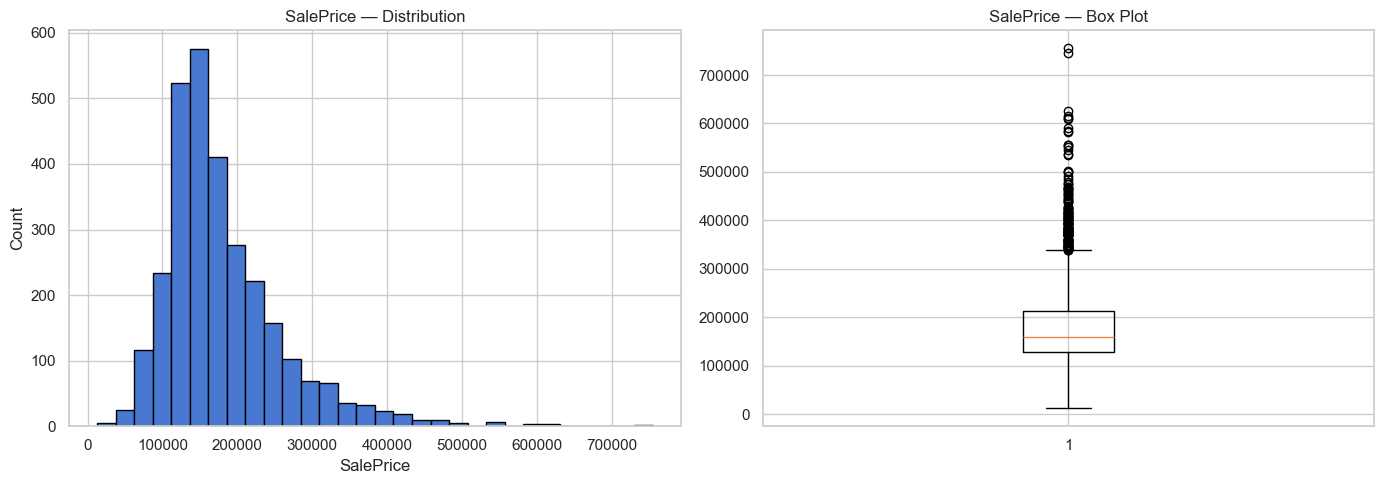

In [9]:
# Target distribution — conditional on TASK
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

if TASK == "regression":
    y.hist(bins=30, edgecolor="black", ax=axes[0])
    axes[0].set_title(f"{TARGET_COL} — Distribution")
    axes[0].set_xlabel(TARGET_COL)
    axes[0].set_ylabel("Count")
    axes[1].boxplot(y.dropna(), vert=True)
    axes[1].set_title(f"{TARGET_COL} — Box Plot")
else:
    counts = y.value_counts().sort_index()
    counts.plot(kind="bar", edgecolor="black", ax=axes[0])
    axes[0].set_title(f"{TARGET_COL} — Class Distribution")
    axes[0].set_xlabel(TARGET_COL)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis="x", rotation=0)
    pct = (counts / counts.sum() * 100).round(1)
    pct.plot(kind="bar", edgecolor="black", ax=axes[1])
    axes[1].set_title(f"{TARGET_COL} — Class Balance (%)")
    axes[1].set_ylabel("%")
    axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

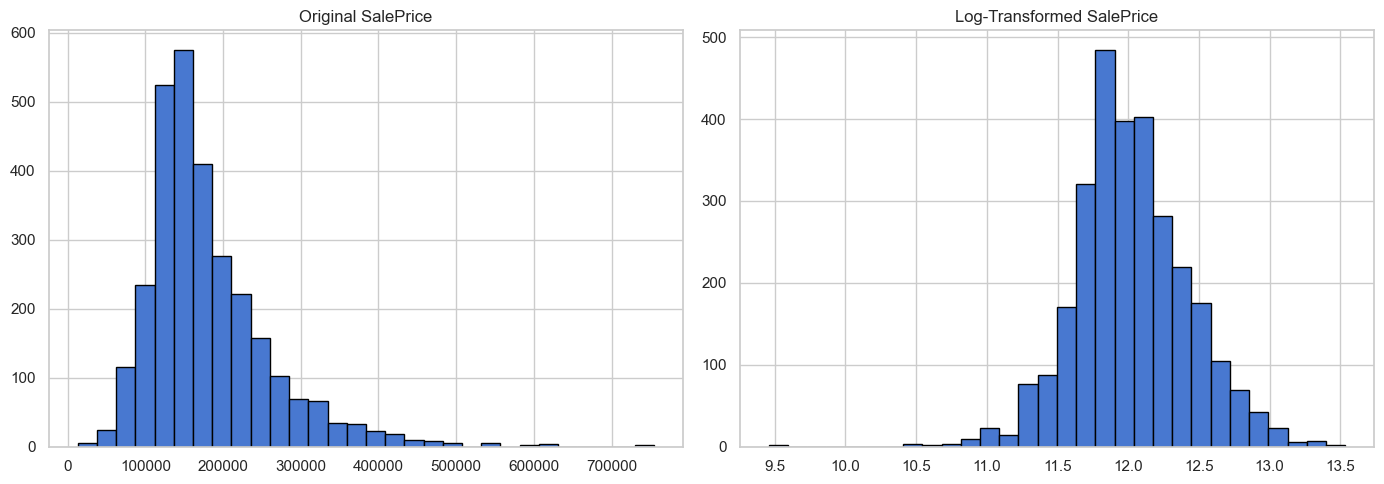

Right-skewed distribution → log transform recommended for modelling.


In [10]:
# Log-transformed target — useful insight for regression tasks
y_log = np.log1p(y)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
y.hist(bins=30, edgecolor="black", ax=axes[0])
axes[0].set_title("Original SalePrice")
y_log.hist(bins=30, edgecolor="black", ax=axes[1])
axes[1].set_title("Log-Transformed SalePrice")
plt.tight_layout()
plt.show()
print("Right-skewed distribution → log transform recommended for modelling.")

---
## 🕳️ 5 · Missing Values

In [11]:
missing = X.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(X) * 100).round(2)

if missing.empty:
    print("No missing values 🎉")
else:
    print(pd.DataFrame({"count": missing, "% of total": missing_pct}).to_string())

              count  % of total
PoolQC         2917       99.56
MiscFeature    2824       96.38
Alley          2732       93.24
Fence          2358       80.48
MasVnrType     1775       60.58
FireplaceQu    1422       48.53
LotFrontage     490       16.72
GarageQual      159        5.43
GarageCond      159        5.43
GarageYrBlt     159        5.43
GarageFinish    159        5.43
GarageType      157        5.36
BsmtExposure     83        2.83
BsmtFinType2     81        2.76
BsmtCond         80        2.73
BsmtQual         80        2.73
BsmtFinType1     80        2.73
MasVnrArea       23        0.78
BsmtFullBath      2        0.07
BsmtHalfBath      2        0.07
BsmtFinSF1        1        0.03
BsmtFinSF2        1        0.03
Electrical        1        0.03
TotalBsmtSF       1        0.03
BsmtUnfSF         1        0.03
GarageArea        1        0.03
GarageCars        1        0.03


---
## 🧹 6 · Data Cleaning

Handle missing values, fix dtypes, remove duplicates, drop irrelevant columns.  
*Heavy cleaning for this dataset was already done during target/feature separation above (dropped Order & PID, stripped whitespace).*

In [12]:
# Check duplicates
n_dup = X.duplicated().sum()
print(f"Duplicates found: {n_dup}")

# Categorical feature cardinality
print("\nCategorical feature cardinality:")
for col in X.select_dtypes(include=["object", "string"]).columns:
    print(f"  {col}: {X[col].nunique()} unique values")

Duplicates found: 2

Categorical feature cardinality:
  MSZoning: 7 unique values
  Street: 2 unique values
  Alley: 2 unique values
  LotShape: 4 unique values
  LandContour: 4 unique values
  Utilities: 3 unique values
  LotConfig: 5 unique values
  LandSlope: 3 unique values
  Neighborhood: 28 unique values
  Condition1: 9 unique values
  Condition2: 8 unique values
  BldgType: 5 unique values
  HouseStyle: 8 unique values
  RoofStyle: 6 unique values
  RoofMatl: 8 unique values
  Exterior1st: 16 unique values
  Exterior2nd: 17 unique values
  MasVnrType: 4 unique values
  ExterQual: 4 unique values
  ExterCond: 5 unique values
  Foundation: 6 unique values
  BsmtQual: 5 unique values
  BsmtCond: 5 unique values
  BsmtExposure: 4 unique values
  BsmtFinType1: 6 unique values
  BsmtFinType2: 6 unique values
  Heating: 6 unique values
  HeatingQC: 5 unique values
  CentralAir: 2 unique values
  Electrical: 5 unique values
  KitchenQual: 5 unique values
  Functional: 8 unique values
  

---
## 📊 7 · Exploratory Data Analysis — Univariate

Distribution of individual features. Separate numeric from categorical using `select_dtypes` — a standard pandas pattern.

In [13]:
# Separate feature types — standard naming used across notebooks & train.py
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "string"]).columns

print(f"Numeric features:     {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

Numeric features:     36
Categorical features: 43


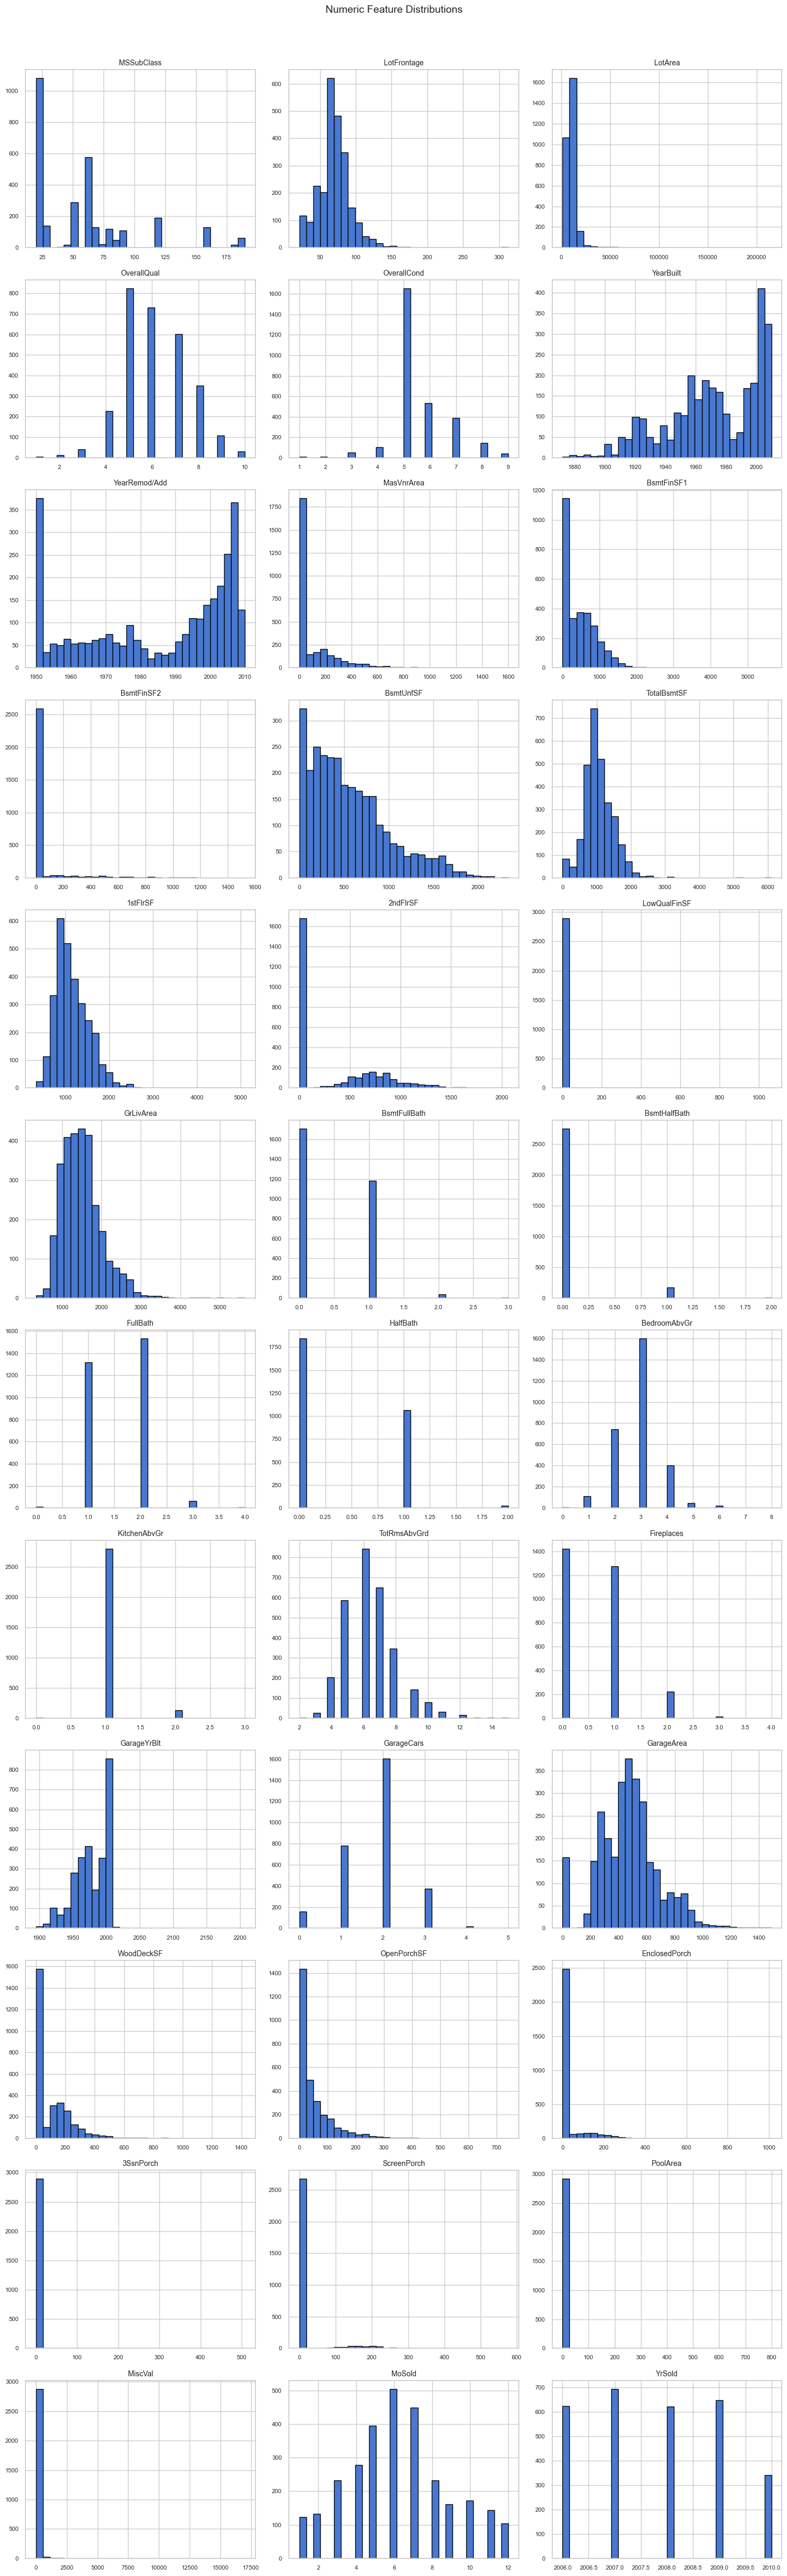

In [14]:
# Numeric distributions — 3 per row
COLS_PER_ROW = 3
n_num = len(numeric_features)
n_rows = math.ceil(n_num / COLS_PER_ROW)

fig, axes = plt.subplots(n_rows, COLS_PER_ROW, figsize=(5 * COLS_PER_ROW, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    X[col].hist(bins=30, edgecolor="black", ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

# Hide unused subplots
for j in range(n_num, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Numeric Feature Distributions", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

⚠️  Skipping high-cardinality columns: Neighborhood


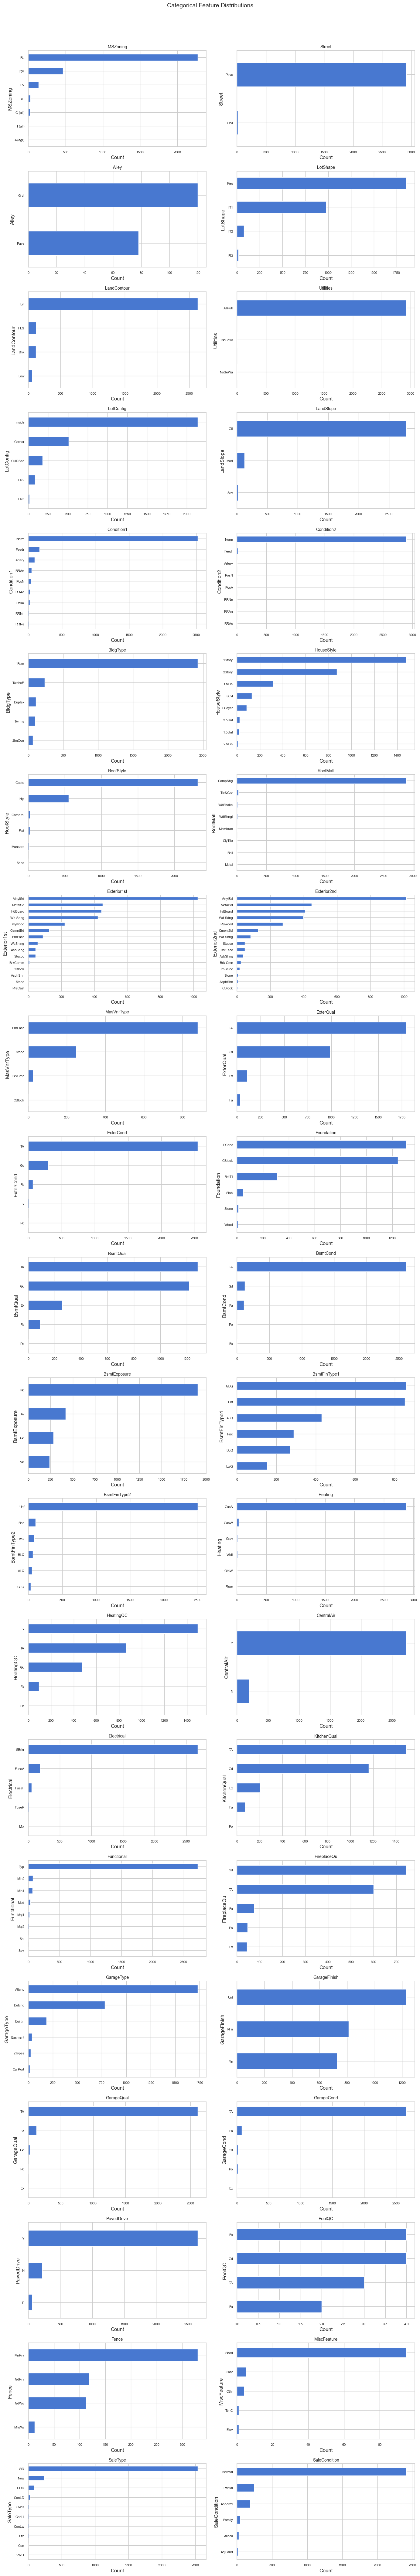

In [15]:
# Categorical value counts — 2 per row (skip high-cardinality columns)
HIGH_CARD_THRESHOLD = 20

plot_cats = [c for c in categorical_features if X[c].nunique() <= HIGH_CARD_THRESHOLD]
skipped = [c for c in categorical_features if X[c].nunique() > HIGH_CARD_THRESHOLD]
if skipped:
    print(f"⚠️  Skipping high-cardinality columns: {', '.join(skipped)}")

CAT_COLS_PER_ROW = 2
n_cats = len(plot_cats)
n_cat_rows = math.ceil(n_cats / CAT_COLS_PER_ROW)

fig, axes = plt.subplots(n_cat_rows, CAT_COLS_PER_ROW,
                         figsize=(7 * CAT_COLS_PER_ROW, 4 * n_cat_rows))
axes = np.array(axes).flatten()

for i, col in enumerate(plot_cats):
    counts = X[col].value_counts().head(15)
    counts.sort_values().plot(kind="barh", ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("Count")
    axes[i].tick_params(labelsize=8)

for j in range(n_cats, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Categorical Feature Distributions", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

---
## 🔗 8 · Exploratory Data Analysis — Bivariate / Multivariate

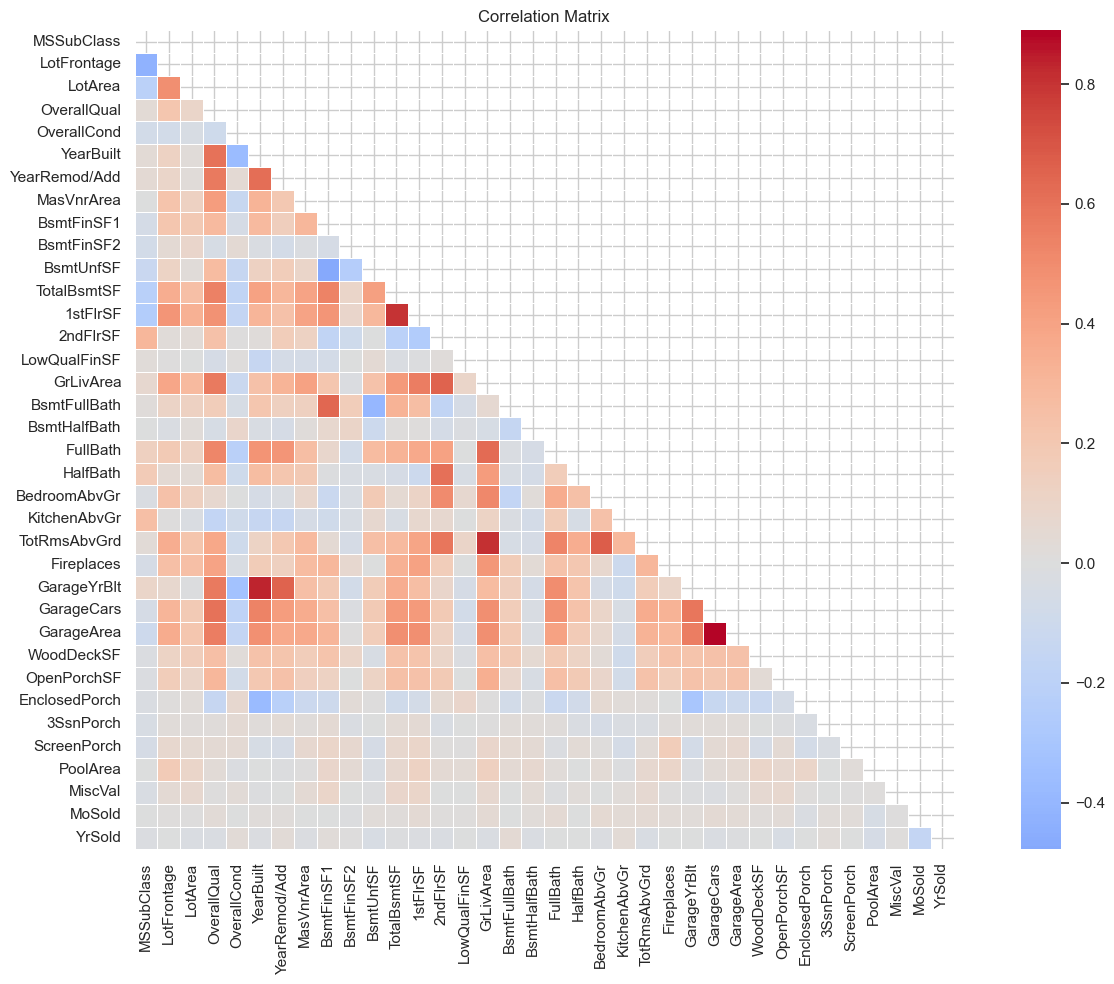

In [16]:
# Correlation matrix (numeric features only)
corr = X[numeric_features].corr()

fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap="coolwarm",
            center=0, square=True, linewidths=0.5, ax=ax)
ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [17]:
# Top correlations with target
target_corr = X[numeric_features].corrwith(y).sort_values(ascending=False)
print("Top positive correlations with target:")
print(target_corr.head(10).to_string())
print("\nTop negative correlations with target:")
print(target_corr.tail(5).to_string())

Top positive correlations with target:
OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965

Top negative correlations with target:
LowQualFinSF    -0.037660
MSSubClass      -0.085092
OverallCond     -0.101697
KitchenAbvGr    -0.119814
EnclosedPorch   -0.128787


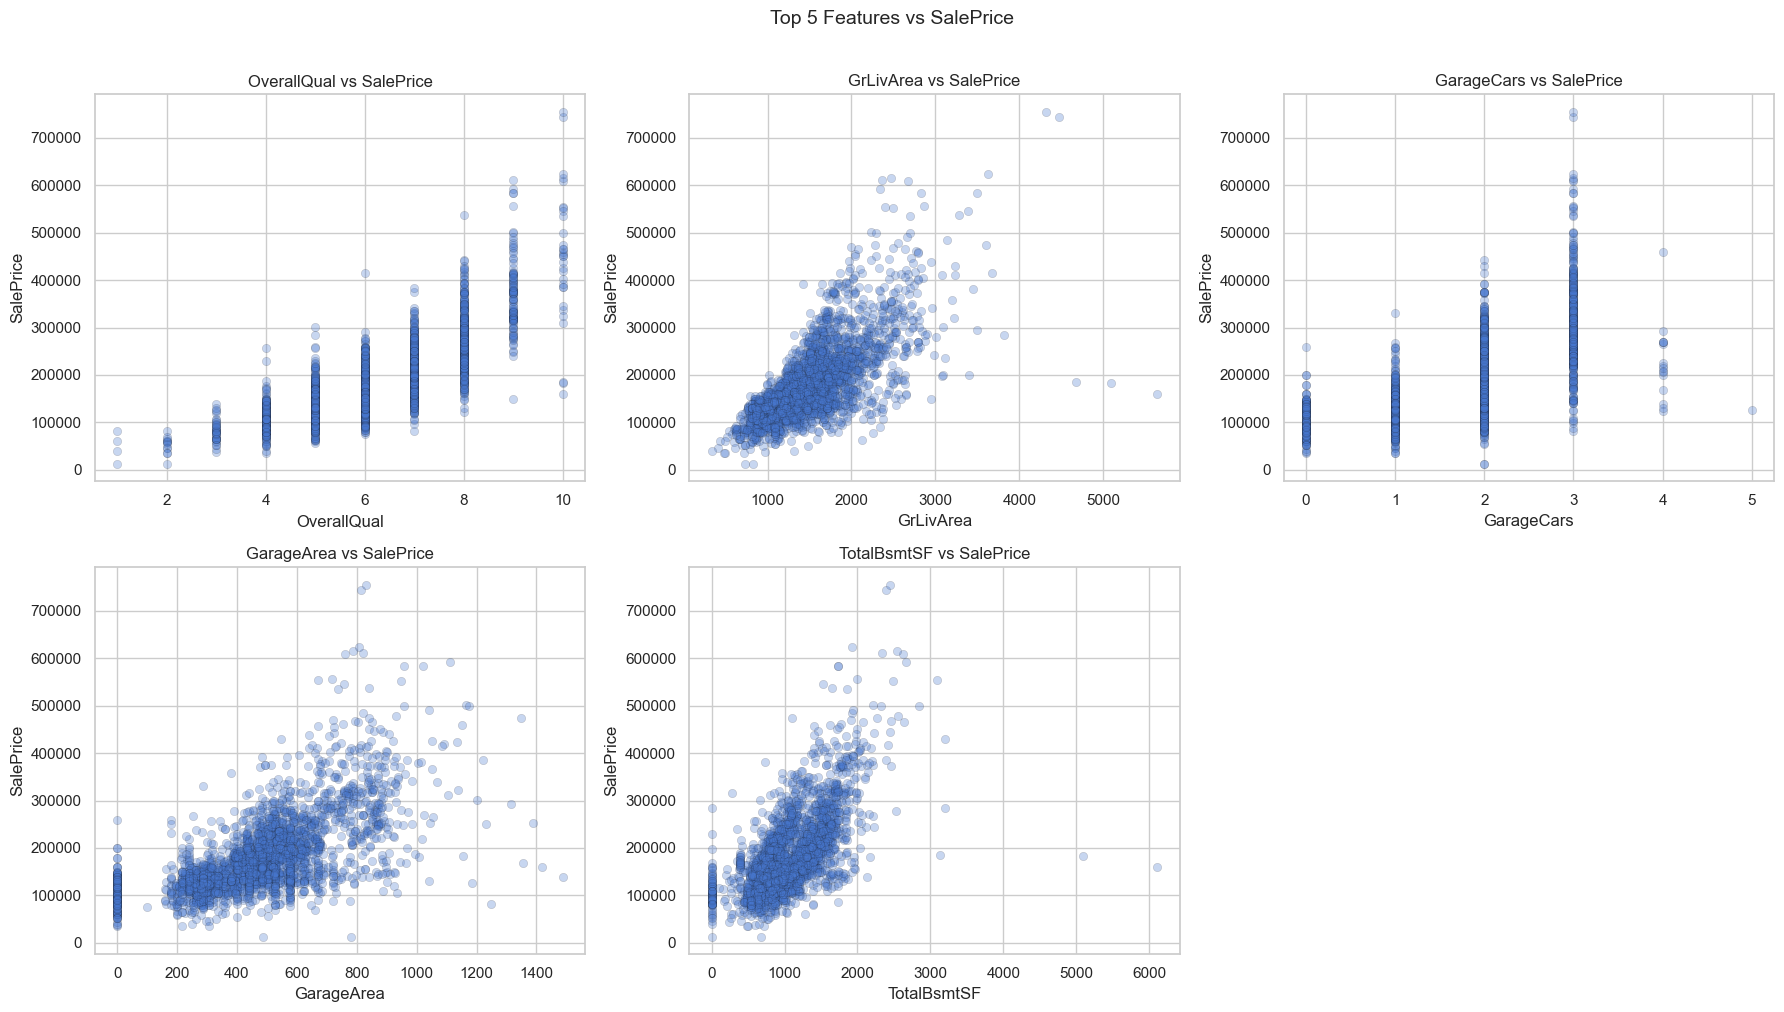

In [18]:
# Target vs top numeric features — grid layout
top_n = 5
top_features = target_corr.abs().sort_values(ascending=False).head(top_n).index.tolist()

BIV_COLS = 3
biv_rows = math.ceil(len(top_features) / BIV_COLS)
fig, axes = plt.subplots(biv_rows, BIV_COLS, figsize=(6 * BIV_COLS, 5 * biv_rows))
axes = np.array(axes).flatten()

for i, col in enumerate(top_features):
    if TASK == "regression":
        axes[i].scatter(X[col], y, alpha=0.3, edgecolors="k", linewidths=0.3)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(TARGET_COL)
        axes[i].set_title(f"{col} vs {TARGET_COL}")
    else:  # classification
        sns.stripplot(x=y, y=X[col], ax=axes[i], alpha=0.3, jitter=True)
        axes[i].set_title(f"{col} by {TARGET_COL} class")

for j in range(len(top_features), len(axes)):
    axes[j].set_visible(False)

fig.suptitle(f"Top {top_n} Features vs {TARGET_COL}", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

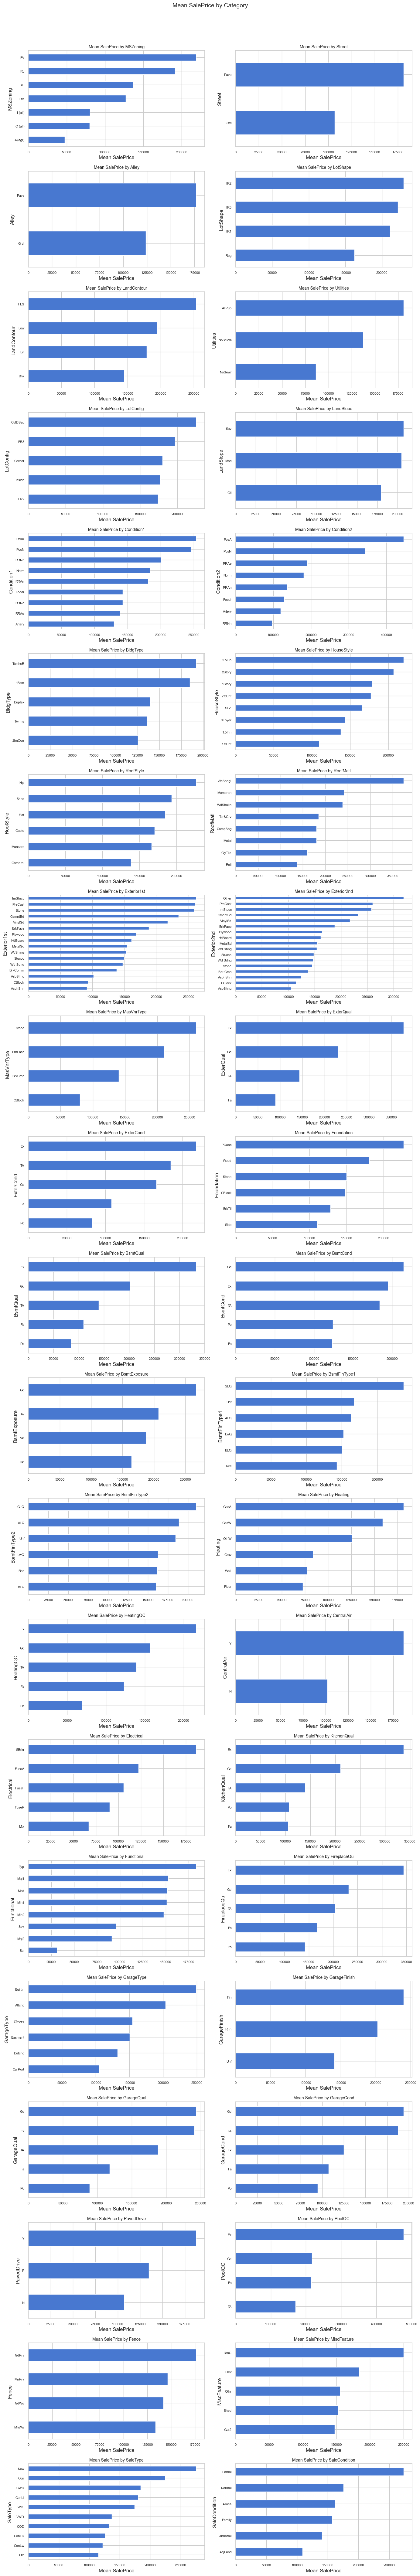

In [19]:
# Target vs categorical features — mean target per category (2 per row)
CAT_BIV_COLS = 2
cat_biv_rows = math.ceil(len(plot_cats) / CAT_BIV_COLS)

fig, axes = plt.subplots(cat_biv_rows, CAT_BIV_COLS,
                         figsize=(7 * CAT_BIV_COLS, 4 * cat_biv_rows))
axes = np.array(axes).flatten()

for i, col in enumerate(plot_cats):
    means = df.groupby(col)[TARGET_COL].mean().sort_values(ascending=True)
    means.plot(kind="barh", ax=axes[i])
    axes[i].set_title(f"Mean {TARGET_COL} by {col}", fontsize=10)
    axes[i].set_xlabel(f"Mean {TARGET_COL}")
    axes[i].tick_params(labelsize=8)

for j in range(len(plot_cats), len(axes)):
    axes[j].set_visible(False)

fig.suptitle(f"Mean {TARGET_COL} by Category", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

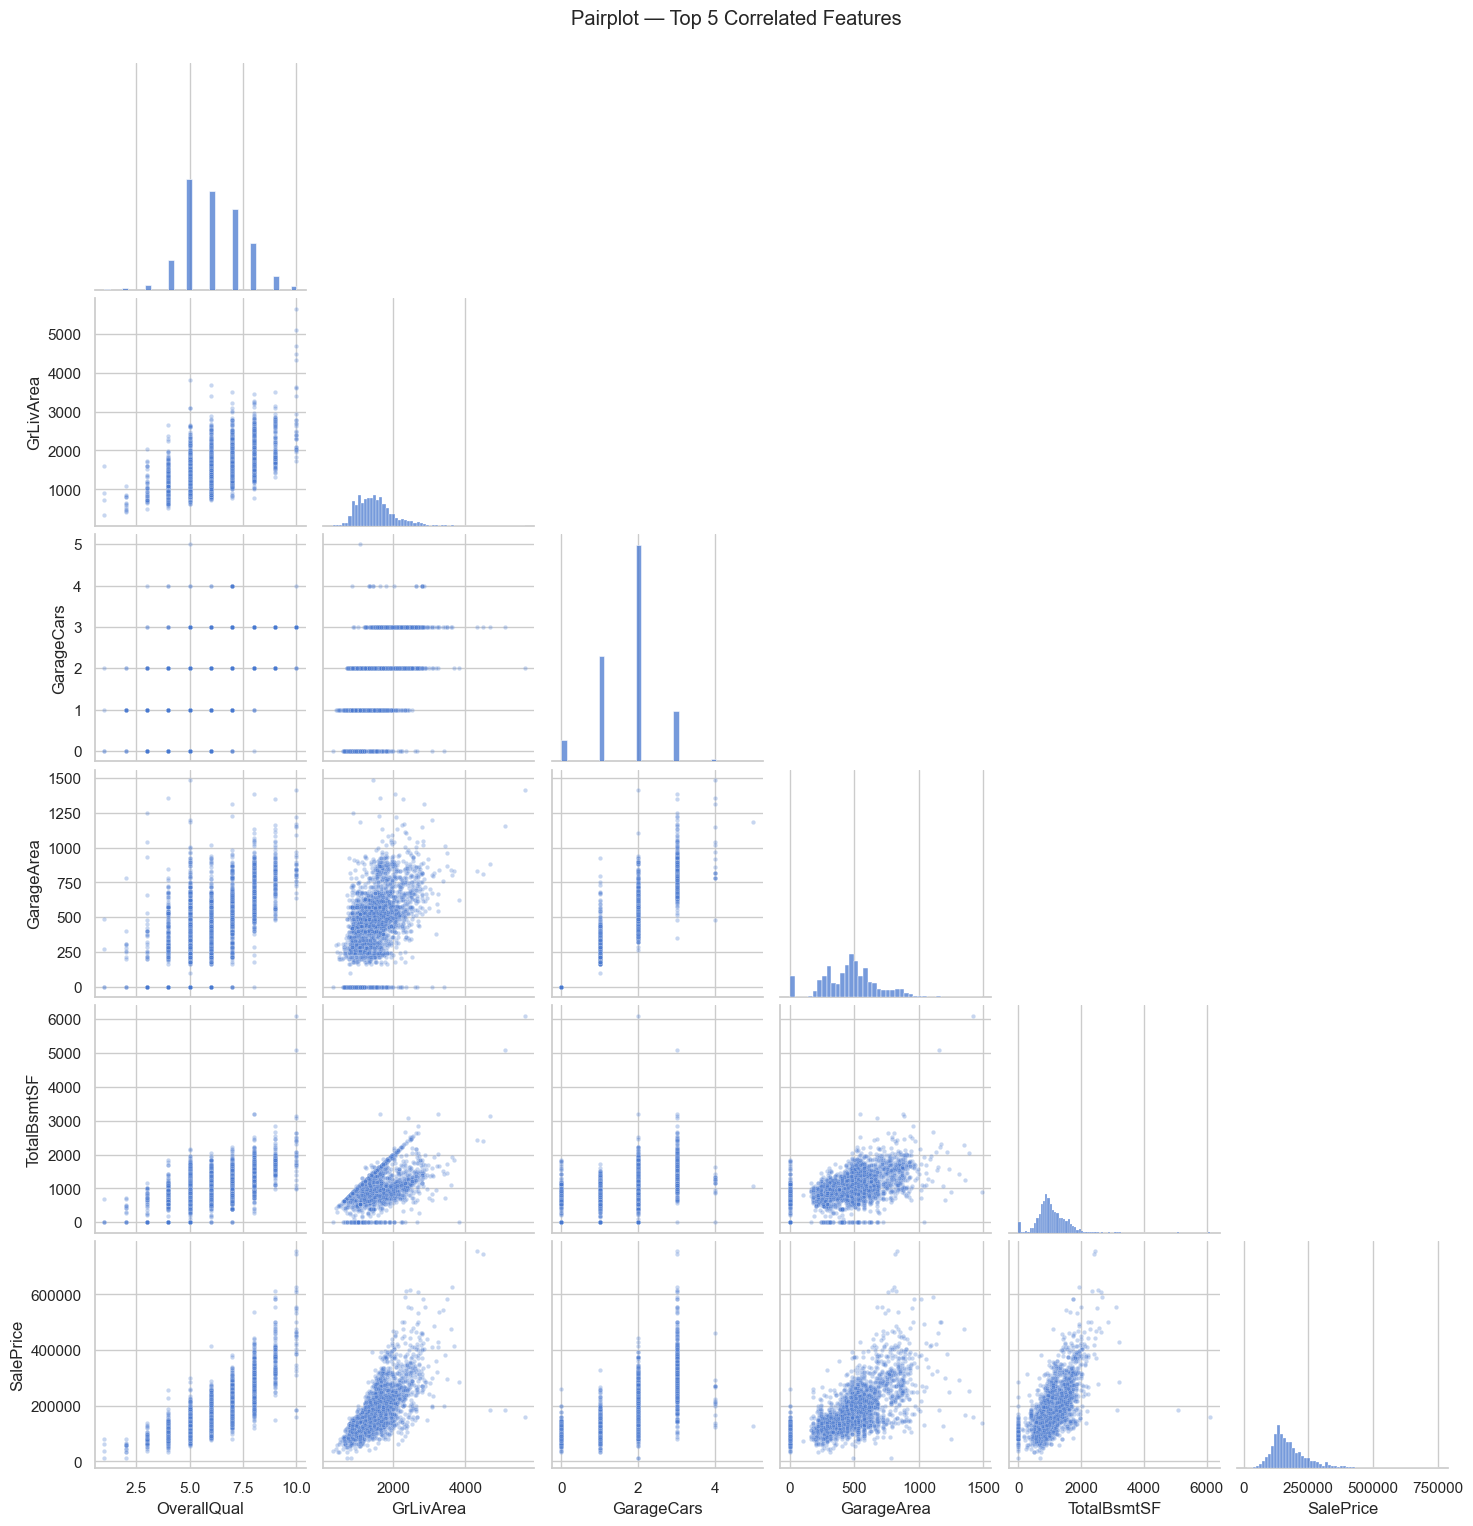

In [20]:
# Pairplot — top 5 numeric features most correlated with target
pair_cols = top_features + [TARGET_COL]
pair_df = df[pair_cols].dropna()

g = sns.pairplot(pair_df, corner=True, plot_kws={"alpha": 0.3, "s": 10})
g.figure.suptitle("Pairplot — Top 5 Correlated Features", y=1.02)
plt.show()

---
## 🚨 9 · Outlier Detection

In [21]:
# IQR-based outlier summary
def outlier_report(dataframe, cols):
    records = []
    for col in cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        n_out = ((dataframe[col] < lower) | (dataframe[col] > upper)).sum()
        records.append({"feature": col, "n_outliers": n_out,
                        "% outliers": round(n_out / len(dataframe) * 100, 2)})
    return pd.DataFrame(records).sort_values("n_outliers", ascending=False)

outlier_report(X, numeric_features)

,feature,n_outliers,% outliers
29,EnclosedPorch,459,15.67
9,BsmtFinSF2,351,11.98
31,ScreenPorch,256,8.74
4,OverallCond,252,8.60
0,MSSubClass,208,7.10
7,MasVnrArea,200,6.83
1,LotFrontage,187,6.38
17,BsmtHalfBath,175,5.97
28,OpenPorchSF,159,5.43
21,KitchenAbvGr,134,4.57


---
## 💡 10 · EDA Summary

### Dataset Overview
- **Rows:** ~2,930
- **Columns:** 82 (80 features + Order + PID dropped)
- **Task:** Regression (predict SalePrice)

### Data Quality Findings
- Several columns have significant missing values (Pool QC, Misc Feature, Alley, Fence)
- Missing values often represent "not applicable" rather than truly missing data
- No duplicate rows

### Target Variable Observations
- Right-skewed distribution → log transform (`np.log1p`) recommended for modelling
- Median ($160k) well below mean ($181k), confirming positive skew
- Some extreme values above $600k

### Key Feature Insights
- `OverallQual` and `GrLivArea` have the strongest linear relationship with SalePrice
- Many categorical features have low cardinality — suitable for one-hot encoding
- Garage and basement features are highly intercorrelated

### Correlations Worth Investigating
- `GarageCars` and `GarageArea` are near-perfectly correlated → possible multicollinearity
- `TotalBsmtSF` and `1stFlrSF` are highly correlated
- `OverallQual` → strongest predictor of SalePrice

### Recommended Preprocessing Steps
- [ ] Drop columns with >60% missing (Pool QC, Misc Feature, Alley)
- [ ] Impute remaining missing values (median for numeric, most frequent for categorical)
- [ ] Log-transform target (`np.log1p`)
- [ ] One-hot encode categorical features
- [ ] Consider removing one of each highly correlated pair
- [ ] Move final pipeline to `src/train.py` ✅ (already done)